In [1]:
import numpy as np
import torch
import glob
import os
import custom_transforms
from tqdm import tqdm
from data_loader import kitti_training_set, training_data_kitti, test_video
from model.model2 import Generator_Net, Discriminator_Net

from torch.utils.data import DataLoader

In [2]:
def tensor2array(tensor):
    tensor = tensor.detach().cpu()
    array = 0.5 + tensor.numpy()*0.5
#     array = array.transpose(1, 2, 0)
    return array

In [3]:
class Config:
        DATASET_PATH = '/media/kuo/32AA7ACBAA7A8ADD/KITTI'
        SINGLE_TEST_PATH = ''
        Pretrained = True
        Pretrained_generator_path = '/media/kuo/32AA7ACBAA7A8ADD/KITTI/VRSA/save_model/generator/generator_39000.tar'
        Pretrained_discriminator_path = '/media/kuo/32AA7ACBAA7A8ADD/KITTI/VRSA/save_model/discriminator/discriminator_39000.tar'
        IS_RGB = False
        BATCH_SIZE = 1

In [4]:
# load dataset
normalize = custom_transforms.Normalize(mean=[0.5], std=[0.5])

train_transform = custom_transforms.Compose([
        custom_transforms.ArrayToTensor(), 
        normalize])

# # kitti_training_set: scenes = ['campus', 'city', 'residential', 'road']
# kitti_training_s = kitti_training_set(DATASET_PATH = Config.DATASET_PATH, scenes=['city', 'residential', 'road'],
#                                         is_rgb = Config.IS_RGB)

# test video
kitti_training_s = test_video('/media/kuo/32AA7ACBAA7A8ADD/KITTI/VRSA/vrsa_dataset/grayscale/1_1')

training_data_kitti = training_data_kitti(kitti_training_s, is_rgb = Config.IS_RGB, transform=train_transform)
trainloader_kitti = torch.utils.data.DataLoader(training_data_kitti, batch_size=Config.BATCH_SIZE,shuffle=False)

# generate model
G_net = Generator_Net(is_rgb = Config.IS_RGB).to(torch.device("cuda"))
D_net = Discriminator_Net(is_rgb = Config.IS_RGB).to(torch.device("cuda"))
if Config.Pretrained:
    G_net.load_state_dict(torch.load(Config.Pretrained_generator_path))
    D_net.load_state_dict(torch.load(Config.Pretrained_discriminator_path))
    print('load success')
else:
    G_net.init_weights()
    D_net.init_weights()

load success


In [6]:
# test
scores = []
for image in tqdm(trainloader_kitti):
    imgs = image.cuda()
    generated_image = G_net(imgs)
    
    img = tensor2array(imgs[0,-1])
    g_img = tensor2array(generated_image[0,-1])
    scores.append(np.mean(abs(img[0]-g_img[0])))


  0%|          | 0/2689 [00:00<?, ?it/s]


In [6]:
print(np.mean(scores))

0.01634749


In [7]:
imgs = imgs.cuda()
generated_image = G_net(imgs)

In [8]:
import matplotlib.pyplot as plt

In [9]:
img = tensor2array(imgs[0,-1])
g_img = tensor2array(generated_image[0,-1])

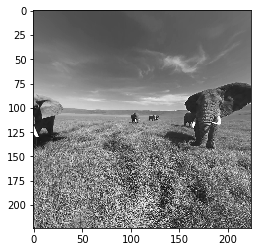

In [16]:
plt.imshow(img[0], cmap='gray')

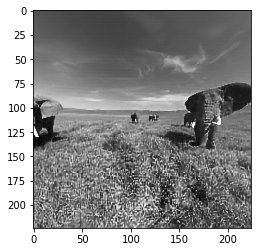

In [17]:
plt.imshow(g_img[0], cmap='gray')

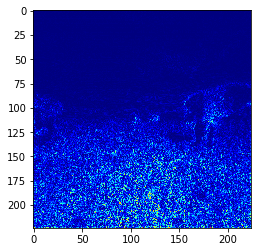

In [20]:
plt.imshow(np.sqrt((img[0]-g_img[0])**2), cmap='jet')

In [13]:
print(np.mean(np.sqrt((img[0]-g_img[0])**2)))

0.090746365
